In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [87]:
import sys  
sys.path.insert(0, r'C:/Users/jugat/Documents/a_JUGATX/FORMACION/DATA SCIENCE/Functions')

from fx_OUTLIERS import *
from functions_plot_EDA import *
from My_EDA_Functions_library import*
from My_EDA_Visualisation_Functions_library import*


In [88]:
#Instagram page for ref
#url= https://www.instagram.com/malaswimwear/?hl=es

# IMPORT 2019 B2C SALES

In [89]:
usecols_ =['FECHA','CLIENTE', 'CANTIDAD','MODELO', 'COLOR', 'TALLA','PRECIO','DESCUENTO','TOTAL','PUNTO DE VENTA']

In [90]:
df_salesB2C_2019 = pd.concat(pd.read_excel('../datasets/Sales/B2C/2019_VENTAS_INVENTARIO_PRODUCCION.xlsx', skiprows=np.arange(0,2),
            usecols= usecols_,
            sheet_name= None), ignore_index = True)

In [91]:
df_salesB2C_2019

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
0,2019-06-05,KAREN (OAXACA),1.0,LOLA,VERDE,M,490.0,0.15,416.5,SHOWROOM
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,EROS,LAVANDA,S,750.0,0.10,675.0,SHOWROOM
2,NaT,NaN,1.0,LOLA,LAVANDA,M,650.0,0.10,585.0,SHOWROOM
3,2019-06-13,IRMA VILLANUEVA,1.0,EROS,LAVANDA,L,750.0,NaN,750.0,SHOWROOM
4,NaT,NaN,1.0,COSUELO,CHERRY,L,1450.0,NaN,1450.0,SHOWROOM
...,...,...,...,...,...,...,...,...,...,...
250,2019-12-18,andrea fuga,1.0,pastora,negro,M,1290.0,0.20,1032.0,INSTAGRAM
251,2019-12-18,Camila,NaN,NaN,NaN,NaN,412.0,NaN,412.0,NaN
252,2019-12-19,Pina,1.0,caña set,blanco,S,1800.0,0.30,1260.0,SHOWROOM
253,2019-12-20,PAU PLMR,1.0,EMILIA,MARSALA,M,1565.0,NaN,1565.0,SHOWROOM


# DATA CLEANSING

In [92]:
df_salesB2C_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           160 non-null    datetime64[ns]
 1   CLIENTE         162 non-null    object        
 2   CANTIDAD        246 non-null    float64       
 3   MODELO          245 non-null    object        
 4   COLOR           245 non-null    object        
 5   TALLA           245 non-null    object        
 6   PRECIO          243 non-null    float64       
 7   DESCUENTO       113 non-null    float64       
 8   TOTAL           250 non-null    float64       
 9   PUNTO DE VENTA  224 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 20.0+ KB


In [93]:
def percentage_nullValues(data):
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [94]:
percentage_nullValues(df_salesB2C_2019)

,Percentage_NaN
DESCUENTO,55.7
FECHA,37.3
CLIENTE,36.5
PUNTO DE VENTA,12.2
PRECIO,4.7
MODELO,3.9
COLOR,3.9
TALLA,3.9
CANTIDAD,3.5
TOTAL,2.0


## Replace NaT and NaN in date and Client

In [95]:
#For items bought by same client on the same date, fill NaT and Nans with ffil method:
#fills value with that in previous row

In [96]:
df_salesB2C_2019['CLIENTE'] = df_salesB2C_2019.CLIENTE.fillna(method='ffill')

In [97]:
df_salesB2C_2019['FECHA'] = df_salesB2C_2019.FECHA.fillna(method='ffill')

In [98]:
df_salesB2C_2019.head()

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
0,2019-06-05,KAREN (OAXACA),1.0,LOLA,VERDE,M,490.0,0.15,416.5,SHOWROOM
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,EROS,LAVANDA,S,750.0,0.10,675.0,SHOWROOM
2,2019-06-12,MA. FERNANDA ORTIZ,1.0,LOLA,LAVANDA,M,650.0,0.10,585.0,SHOWROOM
3,2019-06-13,IRMA VILLANUEVA,1.0,EROS,LAVANDA,L,750.0,NaN,750.0,SHOWROOM
4,2019-06-13,IRMA VILLANUEVA,1.0,COSUELO,CHERRY,L,1450.0,NaN,1450.0,SHOWROOM


In [99]:
df_salesB2C_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           255 non-null    datetime64[ns]
 1   CLIENTE         255 non-null    object        
 2   CANTIDAD        246 non-null    float64       
 3   MODELO          245 non-null    object        
 4   COLOR           245 non-null    object        
 5   TALLA           245 non-null    object        
 6   PRECIO          243 non-null    float64       
 7   DESCUENTO       113 non-null    float64       
 8   TOTAL           250 non-null    float64       
 9   PUNTO DE VENTA  224 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 20.0+ KB


In [100]:
#Delete rows with 0.0 in total (exchanges or presents: no revenue generated)

In [101]:
df_salesB2C_2019.drop(df_salesB2C_2019[df_salesB2C_2019['TOTAL'] == 0].index, inplace = True) 

In [102]:
df_salesB2C_2019.shape

(246, 10)

## Dealing with remaining NaN values 

In [103]:
#Checking for NaN values in TOTAL

In [104]:
df_salesB2C_2019[df_salesB2C_2019['TOTAL'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
53,2019-07-09,Mercedes Bernal,1.0,LOLA,CORAL,L,NaN,NaN,NaN,SHOPIFY
80,2019-07-23,Daniela Gutierrez,1.0,MACA,LAVANDA,S,NaN,NaN,NaN,SHOPIFY
86,2019-07-24,Karen Tavenner,1.0,APOLO,LAVANDA,L,NaN,NaN,NaN,SHOPIFY
150,2019-10-03,Sarah Bajramovic,1.0,GEMINIS TOP,ASH/BLACK,S,790.0,NaN,NaN,SHOPIFY
160,2019-10-21,Natalie Baur,1.0,ARIES,ASH,M,850.0,NaN,NaN,SHOPIFY


In [105]:
df_salesB2C_2019.at[53, 'PRECIO'] = 0

In [106]:
df_salesB2C_2019.at[53, 'DESCUENTO'] = 0

In [107]:
df_salesB2C_2019.at[53, 'TOTAL'] = 0

In [108]:
df_salesB2C_2019.at[80, 'PRECIO'] = 0

In [109]:
df_salesB2C_2019.at[80, 'DESCUENTO'] = 0

In [110]:
df_salesB2C_2019.at[80, 'TOTAL'] = 0

In [111]:
df_salesB2C_2019.at[86, 'PRECIO'] = 0

In [112]:
df_salesB2C_2019.at[86, 'DESCUENTO'] = 0

In [113]:
df_salesB2C_2019.at[86, 'TOTAL'] = 0

In [114]:
df_salesB2C_2019.at[150, 'PRECIO'] = 0

In [115]:
df_salesB2C_2019.at[150, 'DESCUENTO'] = 0

In [116]:
df_salesB2C_2019.at[150, 'TOTAL'] = 0

In [117]:
df_salesB2C_2019.at[160, 'PRECIO'] = 0

In [118]:
df_salesB2C_2019.at[160, 'DESCUENTO'] = 0

In [119]:
df_salesB2C_2019.at[160, 'TOTAL'] = 0

In [120]:
#Double checking

In [121]:
df_salesB2C_2019[df_salesB2C_2019['TOTAL'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA


In [122]:
percentage_nullValues(df_salesB2C_2019)

,Percentage_NaN
DESCUENTO,52.0
PUNTO DE VENTA,9.3
MODELO,4.1
COLOR,4.1
TALLA,4.1
CANTIDAD,3.7
PRECIO,2.4
FECHA,0.0
CLIENTE,0.0
TOTAL,0.0


In [123]:
#Checking for NaN values in PRECIO

In [124]:
df_salesB2C_2019[df_salesB2C_2019['PRECIO'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
136,2019-09-11,CAMI,NaN,NaN,NaN,NaN,NaN,NaN,500.0,SHOWROOM
137,2019-09-11,Jessy Encuadre,NaN,NaN,NaN,NaN,NaN,NaN,200.0,SHOWROOM
144,2019-09-30,Jessy Encuadre,NaN,NaN,NaN,NaN,NaN,NaN,100.0,SHOWROOM
146,2019-10-02,Beth,NaN,NaN,NaN,NaN,NaN,NaN,250.0,SHOWROOM
147,2019-10-03,Fer Villafaña,NaN,NaN,NaN,NaN,NaN,NaN,200.0,SHOWROOM
218,2019-11-30,CATERINA,1.0,ALMA,BLANCO,S,NaN,NaN,1250.0,NaN


In [125]:
df_salesB2C_2019.at[218, 'PRECIO'] = 1250

In [126]:
df_salesB2C_2019.at[160, 'DESCUENTO'] = 0

In [127]:
df_salesB2C_2019.dropna(subset=['PRECIO'], inplace=True)

In [128]:
df_salesB2C_2019[df_salesB2C_2019['PRECIO'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA


In [129]:
percentage_nullValues(df_salesB2C_2019)

,Percentage_NaN
DESCUENTO,51.0
PUNTO DE VENTA,9.5
MODELO,2.1
COLOR,2.1
TALLA,2.1
CANTIDAD,1.7
FECHA,0.0
CLIENTE,0.0
PRECIO,0.0
TOTAL,0.0


In [130]:
#Checking for NaN values in CANTIDAD

In [131]:
df_salesB2C_2019[df_salesB2C_2019['CANTIDAD'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
69,2019-07-18,Genaro Taller,NaN,NaN,NaN,NaN,200.0,NaN,200.0,SHOWROOM
95,2019-07-31,Gaby,NaN,NaN,NaN,NaN,100.0,NaN,100.0,SHOWROOM
153,2019-10-17,Fer Villafaña,NaN,NaN,NaN,NaN,250.0,NaN,250.0,NaN
251,2019-12-18,Camila,NaN,NaN,NaN,NaN,412.0,NaN,412.0,NaN


In [132]:
#Checking for NaN values in TALLA

In [133]:
df_salesB2C_2019[df_salesB2C_2019['TALLA'].isna()]

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
69,2019-07-18,Genaro Taller,NaN,NaN,NaN,NaN,200.0,NaN,200.0,SHOWROOM
95,2019-07-31,Gaby,NaN,NaN,NaN,NaN,100.0,NaN,100.0,SHOWROOM
126,2019-09-05,Beth STAFF,1.0,NaN,NaN,NaN,300.0,0.0,300.0,SHOWROOM
153,2019-10-17,Fer Villafaña,NaN,NaN,NaN,NaN,250.0,NaN,250.0,NaN
251,2019-12-18,Camila,NaN,NaN,NaN,NaN,412.0,NaN,412.0,NaN


In [134]:
df_salesB2C_2019['DESCUENTO'] = df_salesB2C_2019['DESCUENTO'].fillna(0)

In [135]:
df_salesB2C_2019['PUNTO DE VENTA'] = df_salesB2C_2019['PUNTO DE VENTA'].fillna('UNKNOWN')

In [136]:
#After solving NaN values, check for remaining

In [137]:
percentage_nullValues(df_salesB2C_2019)

,Percentage_NaN
MODELO,2.1
COLOR,2.1
TALLA,2.1
CANTIDAD,1.7
FECHA,0.0
CLIENTE,0.0
PRECIO,0.0
DESCUENTO,0.0
TOTAL,0.0
PUNTO DE VENTA,0.0


In [138]:
#Drop NaNs
df_salesB2C_2019 = df_salesB2C_2019.dropna()

In [139]:
df_salesB2C_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           236 non-null    datetime64[ns]
 1   CLIENTE         236 non-null    object        
 2   CANTIDAD        236 non-null    float64       
 3   MODELO          236 non-null    object        
 4   COLOR           236 non-null    object        
 5   TALLA           236 non-null    object        
 6   PRECIO          236 non-null    float64       
 7   DESCUENTO       236 non-null    float64       
 8   TOTAL           236 non-null    float64       
 9   PUNTO DE VENTA  236 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 20.3+ KB


## Obtaining consistency accross categorical data

In [140]:
#Changing to lower case
df_salesB2C_2019['MODELO'] = df_salesB2C_2019['MODELO'].str.lower()
df_salesB2C_2019['COLOR'] = df_salesB2C_2019['COLOR'].str.lower()

In [141]:
df_salesB2C_2019.head()

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
0,2019-06-05,KAREN (OAXACA),1.0,lola,verde,M,490.0,0.15,416.5,SHOWROOM
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,eros,lavanda,S,750.0,0.10,675.0,SHOWROOM
2,2019-06-12,MA. FERNANDA ORTIZ,1.0,lola,lavanda,M,650.0,0.10,585.0,SHOWROOM
3,2019-06-13,IRMA VILLANUEVA,1.0,eros,lavanda,L,750.0,0.00,750.0,SHOWROOM
4,2019-06-13,IRMA VILLANUEVA,1.0,cosuelo,cherry,L,1450.0,0.00,1450.0,SHOWROOM


In [142]:
#Removing blank spaces in the MODELO column
df_salesB2C_2019.MODELO = df_salesB2C_2019.MODELO.str.rstrip()

In [143]:
df_salesB2C_2019.MODELO.unique()

array(['lola', 'eros', 'cosuelo', 'apolo', 'maca', 'pastora', 'emilia',
       'caña', 'maria', 'lucia', 'venus', 'paloma', 'geminis top',
       'geminis botton', 'consuelo', 'naranjo', 'aries', 'gracia', 'nina',
       'caña bottom', 'candela', 'alma', 'barreto', 'maria btt',
       '3 gracias', 'jeronimo', 'top geminis', 'botton geminis',
       'marcelo set', 'top caña', 'marcelo bodysuit', 'palma bodysuit',
       'olivia', 'maria top', 'maria bottom', 'geminis bottom',
       'leo bottom', 'maca bottom', 'lola bottom', 'milo', 'milo set',
       'mara', 'caña bodysuit', 'bodysuit', 'dolores', 'top milo',
       'samples', 'sabina', 'top lucia', 'libra', 'margot', 'leandro',
       'leo', 'sample', 'set marcelo', 'caña set'], dtype=object)

In [144]:
#Matching model names to surpass typing differences - using mapping
mapping  = {'cosuelo': 'consuelo', 'geminis botton':'geminis bottom', 'maria btt': 'maria bottom',
             '3 gracias': '3gracias', 'top geminis': 'geminis top', 'botton geminis': 'geminis bottom', 
           'top caña': 'caña top' }

df_salesB2C_2019['MODELO'].replace(mapping, inplace=True)

In [145]:
#Adding type to model name on those missing using price as a reference
df_salesB2C_2019.loc[(df_salesB2C_2019.PRECIO >= 1000),'MODELO']= df_salesB2C_2019['MODELO'].astype(str) + ' ' + 'bodysuit'

In [146]:
df_salesB2C_2019['MODELO'].unique()

array(['lola', 'eros', 'consuelo bodysuit', 'apolo', 'maca',
       'pastora bodysuit', 'emilia bodysuit', 'caña', 'maria', 'lucia',
       'venus bodysuit', 'paloma bodysuit', 'geminis top',
       'geminis bottom', 'naranjo bodysuit', 'aries', 'eros bodysuit',
       'gracia bodysuit', 'nina', 'caña bottom', 'candela',
       'alma bodysuit', 'barreto bodysuit', 'maria bottom',
       '3gracias bodysuit', 'jeronimo', 'alma', 'marcelo set bodysuit',
       'caña top', 'marcelo bodysuit bodysuit', 'palma bodysuit bodysuit',
       'olivia bodysuit', 'maria top', 'leo bottom', 'maca bottom',
       'lola bottom', 'milo bodysuit', 'milo set bodysuit', 'mara',
       'caña bodysuit bodysuit', 'bodysuit', 'dolores', 'top milo',
       'samples', 'sabina', 'top lucia', 'libra', 'margot', 'leandro',
       'leo', 'sample', 'set marcelo bodysuit', 'caña set bodysuit'],
      dtype=object)

In [147]:
#Using regular expression to remove type of model where applied twice due to previous line of code
df_salesB2C_2019['MODELO'] = df_salesB2C_2019['MODELO'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')

In [148]:
df_salesB2C_2019['MODELO'].unique()

array(['lola', 'eros', 'consuelo bodysuit', 'apolo', 'maca',
       'pastora bodysuit', 'emilia bodysuit', 'caña', 'maria', 'lucia',
       'venus bodysuit', 'paloma bodysuit', 'geminis top',
       'geminis bottom', 'naranjo bodysuit', 'aries', 'eros bodysuit',
       'gracia bodysuit', 'nina', 'caña bottom', 'candela',
       'alma bodysuit', 'barreto bodysuit', 'maria bottom',
       '3gracias bodysuit', 'jeronimo', 'alma', 'marcelo set bodysuit',
       'caña top', 'marcelo bodysuit', 'palma bodysuit',
       'olivia bodysuit', 'maria top', 'leo bottom', 'maca bottom',
       'lola bottom', 'milo bodysuit', 'milo set bodysuit', 'mara',
       'caña bodysuit', 'bodysuit', 'dolores', 'top milo', 'samples',
       'sabina', 'top lucia', 'libra', 'margot', 'leandro', 'leo',
       'sample', 'set marcelo bodysuit', 'caña set bodysuit'],
      dtype=object)

In [149]:
#Removing 'set' for consistency accross dataset
df_salesB2C_2019['MODELO'] = df_salesB2C_2019['MODELO'].str.replace('set', '')

In [150]:
df_salesB2C_2019['MODELO'].unique()

array(['lola', 'eros', 'consuelo bodysuit', 'apolo', 'maca',
       'pastora bodysuit', 'emilia bodysuit', 'caña', 'maria', 'lucia',
       'venus bodysuit', 'paloma bodysuit', 'geminis top',
       'geminis bottom', 'naranjo bodysuit', 'aries', 'eros bodysuit',
       'gracia bodysuit', 'nina', 'caña bottom', 'candela',
       'alma bodysuit', 'barreto bodysuit', 'maria bottom',
       '3gracias bodysuit', 'jeronimo', 'alma', 'marcelo  bodysuit',
       'caña top', 'marcelo bodysuit', 'palma bodysuit',
       'olivia bodysuit', 'maria top', 'leo bottom', 'maca bottom',
       'lola bottom', 'milo bodysuit', 'milo  bodysuit', 'mara',
       'caña bodysuit', 'bodysuit', 'dolores', 'top milo', 'samples',
       'sabina', 'top lucia', 'libra', 'margot', 'leandro', 'leo',
       'sample', ' marcelo bodysuit', 'caña  bodysuit'], dtype=object)

In [151]:
#Exporting to csv
df_salesB2C_2019.to_csv('SalesB2C_2019.csv')

# FEATURE ENGINEERING

In [152]:
df_salesB2C_2019.head()

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
0,2019-06-05,KAREN (OAXACA),1.0,lola,verde,M,490.0,0.15,416.5,SHOWROOM
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,eros,lavanda,S,750.0,0.10,675.0,SHOWROOM
2,2019-06-12,MA. FERNANDA ORTIZ,1.0,lola,lavanda,M,650.0,0.10,585.0,SHOWROOM
3,2019-06-13,IRMA VILLANUEVA,1.0,eros,lavanda,L,750.0,0.00,750.0,SHOWROOM
4,2019-06-13,IRMA VILLANUEVA,1.0,consuelo bodysuit,cherry,L,1450.0,0.00,1450.0,SHOWROOM


In [153]:
#TALLA

In [154]:
# Mapping for consistency accross sizes
replace_talla = {'TALLA': { 'm':'M', 's':'S', 'G':'L', 'l':'L'}}
df_salesB2C_2019.replace(replace_talla, inplace=True)

In [155]:
# Mapping for categorical to numerical data transformation
replace_map = {'TALLA': {'XS':1,'S': 2, 'M': 3, 'L': 4, 'XL':5}}

In [156]:
df_salesB2C_2019_replace = df_salesB2C_2019.copy()

# Replace the values with the corresponding map created
df_salesB2C_2019_replace.replace(replace_map, inplace=True)

print(df_salesB2C_2019_replace.head())
df_salesB2C_2019_replace

       FECHA             CLIENTE  CANTIDAD             MODELO    COLOR TALLA  \
0 2019-06-05      KAREN (OAXACA)       1.0               lola    verde     3   
1 2019-06-12  MA. FERNANDA ORTIZ       1.0               eros  lavanda     2   
2 2019-06-12  MA. FERNANDA ORTIZ       1.0               lola  lavanda     3   
3 2019-06-13     IRMA VILLANUEVA       1.0               eros  lavanda     4   
4 2019-06-13     IRMA VILLANUEVA       1.0  consuelo bodysuit   cherry     4   

   PRECIO  DESCUENTO   TOTAL PUNTO DE VENTA  
0   490.0       0.15   416.5       SHOWROOM  
1   750.0       0.10   675.0       SHOWROOM  
2   650.0       0.10   585.0       SHOWROOM  
3   750.0       0.00   750.0       SHOWROOM  
4  1450.0       0.00  1450.0       SHOWROOM  


,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA
0,2019-06-05,KAREN (OAXACA),1.0,lola,verde,3,490.0,0.15,416.5,SHOWROOM
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,eros,lavanda,2,750.0,0.10,675.0,SHOWROOM
2,2019-06-12,MA. FERNANDA ORTIZ,1.0,lola,lavanda,3,650.0,0.10,585.0,SHOWROOM
3,2019-06-13,IRMA VILLANUEVA,1.0,eros,lavanda,4,750.0,0.00,750.0,SHOWROOM
4,2019-06-13,IRMA VILLANUEVA,1.0,consuelo bodysuit,cherry,4,1450.0,0.00,1450.0,SHOWROOM
...,...,...,...,...,...,...,...,...,...,...
249,2019-12-16,Manu demichelis,1.0,paloma bodysuit,tan,3,1565.0,0.00,1565.0,INSTAGRAM
250,2019-12-18,andrea fuga,1.0,pastora bodysuit,negro,3,1290.0,0.20,1032.0,INSTAGRAM
252,2019-12-19,Pina,1.0,caña bodysuit,blanco,2,1800.0,0.30,1260.0,SHOWROOM
253,2019-12-20,PAU PLMR,1.0,emilia bodysuit,marsala,3,1565.0,0.00,1565.0,SHOWROOM


In [157]:
df_salesB2C_2019_replace.TALLA.unique()

array([3, 2, 4, 5, 1, 'S/M'], dtype=object)

In [158]:
df_salesB2C_2019_replace.TALLA.value_counts()

2      85
3      83
4      61
5       3
1       3
S/M     1
Name: TALLA, dtype: int64

In [159]:
#dealing with unique value S/M
df_salesB2C_2019_replace= df_salesB2C_2019_replace[~df_salesB2C_2019_replace['TALLA'].isin(['S/M'])]

In [160]:
df_salesB2C_2019_replace.TALLA.value_counts()

2    85
3    83
4    61
5     3
1     3
Name: TALLA, dtype: int64

In [161]:
#COLOR

In [162]:
df_salesB2C_2019_replace.COLOR.unique()

array(['verde', 'lavanda', 'cherry', 'cotton candy', 'dark cobalt',
       'negro', 'coral', 'blanco', 'tan', 'verde esmeralda', 'azul',
       'ash', 'deep indigo', 'ash/lavanda', 'clay', 'sage', 'claro',
       'cotton', 'palma', 'lav/ash/coral', 'black', 'flores print',
       'ash/lavander', 'white', 'ash/negro', 'copper', 'ash/black',
       'indigo', 'set', 'herraduras', 'dusty pink', 'samples',
       'negro metalico', 'marsala', 'print flowers', 'dusty rose',
       'deep green', 'amarillo', 'print', 'hot magma'], dtype=object)

In [163]:
df_salesB2C_2019_replace.COLOR.nunique()

40

In [164]:
# Mapping for consistency accross colors
replace_color = {'COLOR': { 'lav/ash/coral': 'lavanda/ash/coral', 'black':'negro',
             'ash/lavander': 'ash/lavanda', 'ash/black': 'ash/negro', 'cotton':'cotton candy'}}
df_salesB2C_2019_replace.replace(replace_color, inplace=True)

In [165]:
df_salesB2C_2019_replace.COLOR.nunique()

36

In [166]:
df_salesB2C_2019_replace.MODELO.nunique()

52

In [167]:
#Encoding colors with label encoder

from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
df_salesB2C_2019_replace['COLOR_CODE'] = lb_make.fit_transform(df_salesB2C_2019_replace['COLOR'])

df_salesB2C_2019_replace.head() #Results in appending a new column to df

,FECHA,CLIENTE,CANTIDAD,MODELO,COLOR,TALLA,PRECIO,DESCUENTO,TOTAL,PUNTO DE VENTA,COLOR_CODE
0,2019-06-05,KAREN (OAXACA),1.0,lola,verde,3,490.0,0.15,416.5,SHOWROOM,33
1,2019-06-12,MA. FERNANDA ORTIZ,1.0,eros,lavanda,2,750.0,0.10,675.0,SHOWROOM,21
2,2019-06-12,MA. FERNANDA ORTIZ,1.0,lola,lavanda,3,650.0,0.10,585.0,SHOWROOM,21
3,2019-06-13,IRMA VILLANUEVA,1.0,eros,lavanda,4,750.0,0.00,750.0,SHOWROOM,21
4,2019-06-13,IRMA VILLANUEVA,1.0,consuelo bodysuit,cherry,4,1450.0,0.00,1450.0,SHOWROOM,6


# Visualisations

In [168]:
#scatter plot for simultaneous size, model and color

fig = px.scatter(df_salesB2C_2019_replace, x='COLOR', y='TALLA', 
                 color='MODELO',
                 size= 'CANTIDAD',
                )
fig.update_yaxes(tickvals = df_salesB2C_2019_replace['TALLA'].unique(),
                 )

fig.update_xaxes(tickangle=-90)

fig.write_html("sales_global.html")

fig.show()

In [169]:
#Copy of dataframe
df= df_salesB2C_2019_replace.copy()

In [170]:
#Export of data
df.to_excel('sales_model.xlsx')

No handles with labels found to put in legend.


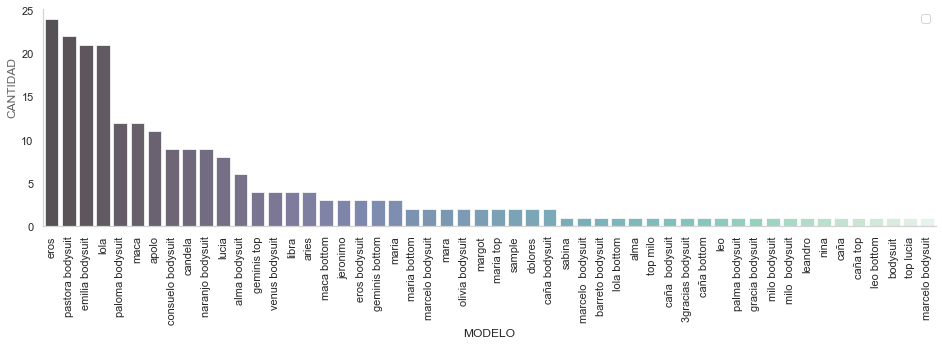

In [171]:
#Bar chart for Best Seller MODEL (seaborn)

fig = plt.figure(figsize=(16,4))

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.countplot(x='MODELO', data=df, palette='mako', alpha=0.7, order=df['MODELO'].value_counts().index)

#sns.countplot(x=df.MODELO.sort_values(ascending=False).index.values, data=df, palette='Blues', alpha=0.7)


ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('CANTIDAD',fontsize=12,color='#616161',ha='left',va='bottom')
plt.legend()
plt.xticks(rotation='vertical')

plt.show()
fig.savefig('Sales_Model.png',bbox_inches="tight")

No handles with labels found to put in legend.


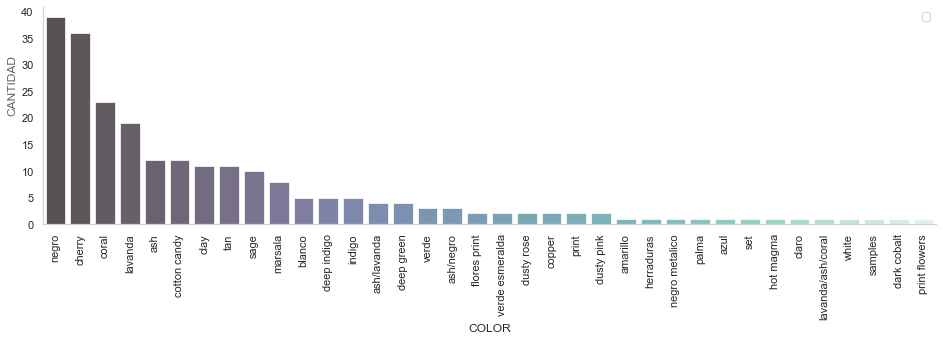

In [172]:
#Bar chart for Best Seller COlOR (seaborn)


fig = plt.figure(figsize=(16,4))

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.countplot(x='COLOR', data=df, palette='mako', alpha=0.7, order=df['COLOR'].value_counts().index)

#sns.countplot(x=df.MODELO.sort_values(ascending=False).index.values, data=df, palette='Blues', alpha=0.7)


ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('CANTIDAD',fontsize=12,color='#616161',ha='left',va='bottom')
plt.legend()
plt.xticks(rotation='vertical')

plt.show()
fig.savefig('Sales_Color.png',bbox_inches="tight")

No handles with labels found to put in legend.


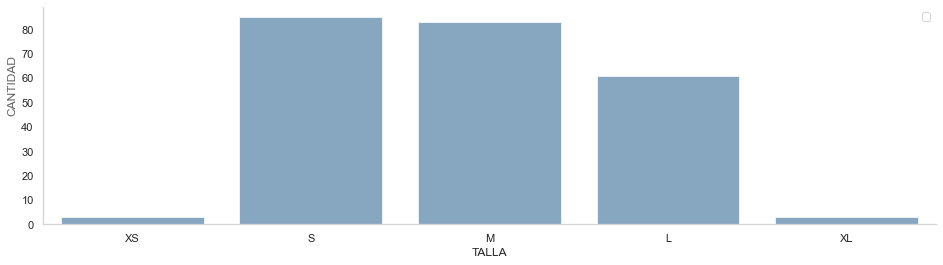

In [173]:
#Bar chart for SIZE sales (seaborn)

fig = plt.figure(figsize=(16,4))

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.countplot(x='TALLA', data=df, color='#4682B4', alpha=0.7)

#sns.countplot(x=df.MODELO.sort_values(ascending=False).index.values, data=df, palette='Blues', alpha=0.7)

#plt.xticks( rotation='vertical')

ax.set_xticklabels(['XS','S','M','L','XL'])


#values=df['TALLA'].value_counts().values
#for i, p in enumerate(ax.patches):
 #   height = p.get_height()
  #  ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('CANTIDAD',fontsize=12,color='#616161',ha='left',va='bottom')
plt.legend()


plt.show()
fig.savefig('Sales_Talla.png',bbox_inches="tight")

In [ ]:
#practising with plotly express

In [176]:
#international_color = df_filtered['TOTAL VENTAS NETAS'].astype('float').values

fig= plt.figure(figsize=(14,2))
colors_2014 = ['azure', 'greys', 'ice']
fig = px.bar(df, x = "MODELO", 
                 y = "CANTIDAD") 
                 
#fig.update_layout(barmode='group')

plot_bgcolor = 'rgba(0,0,0,0)'

fig.update_layout(title_text="Sales - Model",
                  title_font_size=30)

fig.show()
#fig.write_image("Sales_B2C.png")
#fig.savefig('Sales_B2C.png',bbox_inches="tight")

<Figure size 1008x144 with 0 Axes>

In [178]:
fig= plt.figure()
colors_2014 = ['azure', 'greys', 'ice']
fig = px.bar(df, x = "TALLA", 
                 y = "CANTIDAD") 
                 

fig.update_layout(barmode='group')
 # Step 2: Update the layout of the plot

# hide and lock down axes
#fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout()

fig.show()
#fig.savefig('Sales_B2C.png',bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

In [179]:
fig= plt.figure()
colors_2014 = ['azure', 'greys', 'ice']
fig = px.bar(df, x = "COLOR", 
                 y = "CANTIDAD") 
                 

fig.update_layout(barmode='group')
 # Step 2: Update the layout of the plot

# hide and lock down axes
#fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout()

fig.show()
#fig.savefig('Sales_B2C.png',bbox_inches="tight")

<Figure size 432x288 with 0 Axes>